# Exploratory Data Analysis (EDA) using Python and Seaborn

Here we will be using a dataset from kaggle.com, Here we are using the dataset of sleep health and lifestyle by LAKSIKA THARMALINGAM.

Link to dataset: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Steps to be followed:
1. Data Collection : Downloading dataset from Kaggle.com
2. Data Loading : Loading the dataset into Data Frame
3. Initial Exploration : Printing of head, data types, and summarising the data values
4. Data Cleaning : Handling missing values, correcting data type, removing duplicates if any, handle outliers if necessary
5. Data Visualisation : Using various graphs, Univariate analysis , Bivariate analysis , Multivariate analysis and will visualise the missing data.
6. Statistical Analysis : Descriptive statistics, Correlation analysis, Hypothesis testing  
7. Feature Engineering : Create new features if necessary, hot-encode categorical variables, normalize or standardize data if needed.
8. Summary and Reporting: Summarize key findings, provide insights based on the analysis, suggest potential next steps.

Disclaimer: The following might not be the best presentation of the work but this is done with an intention of understanding things.


In [31]:
# installing necessary pip packages
!pip install seaborn pandas matplotlib scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 27.2 MB/s eta 0:00:0000:0100:01


In [47]:
# Importing necessary packages
import pandas as pd # interpreatation of data
import seaborn as sns # graph
import matplotlib.pyplot as plt #  graph
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('dataset/kaggle/Day-1_EDA/sleep_health_and_lifestyle_dataset.csv')

# Display the first few rows of the dataset
df.head() # print first 5 values

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [48]:
# Data overview

# Check the data types of each column
df.info()

# Summarising the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [52]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [54]:
# Data cleaning

# Identify missing values
missing_values = df.isnull().sum()
print(missing_values) # List all missing values

# Remove duplicates
df.drop_duplicates(inplace=True)

# Replacing the Sleep Disorder Nan with 'No Disorder'ß
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')



# Converting to category type
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
after_cleaning = df.isnull().sum()
print(after_cleaning)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [55]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

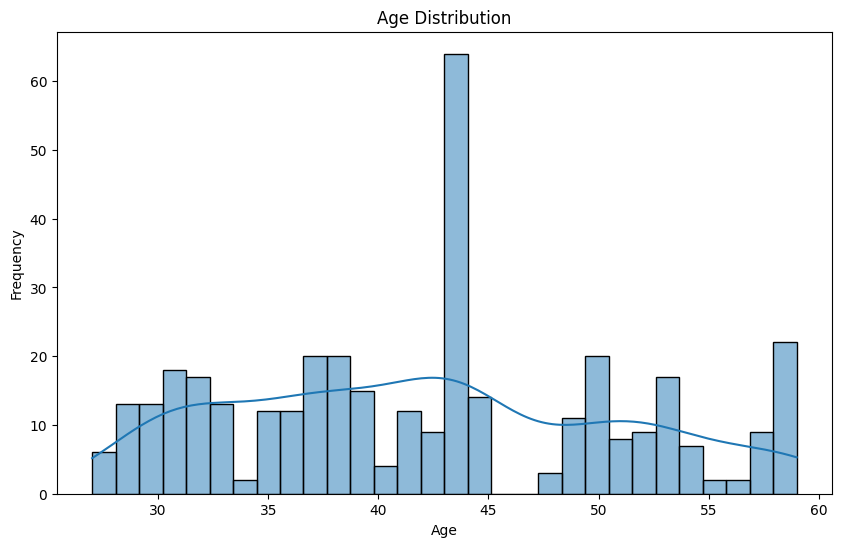

In [56]:
# Distribution of Age - How people are distributed in the data
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The following data can be clearly showing it's collected from age group of 43 and 44 age group

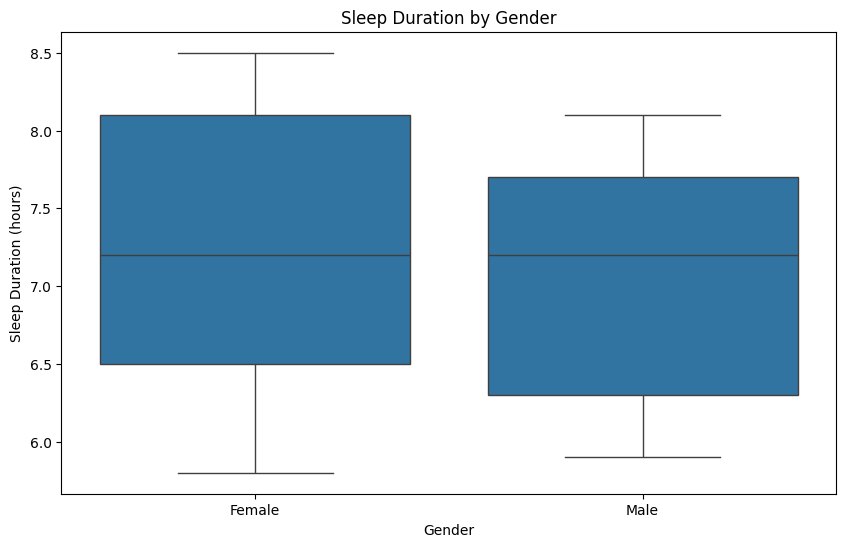

In [57]:
# Unverstanding the data based on the Gender and Sleep Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.show()

- The median line in the graph shows both male and female sleep around the 7.2 hours per day.

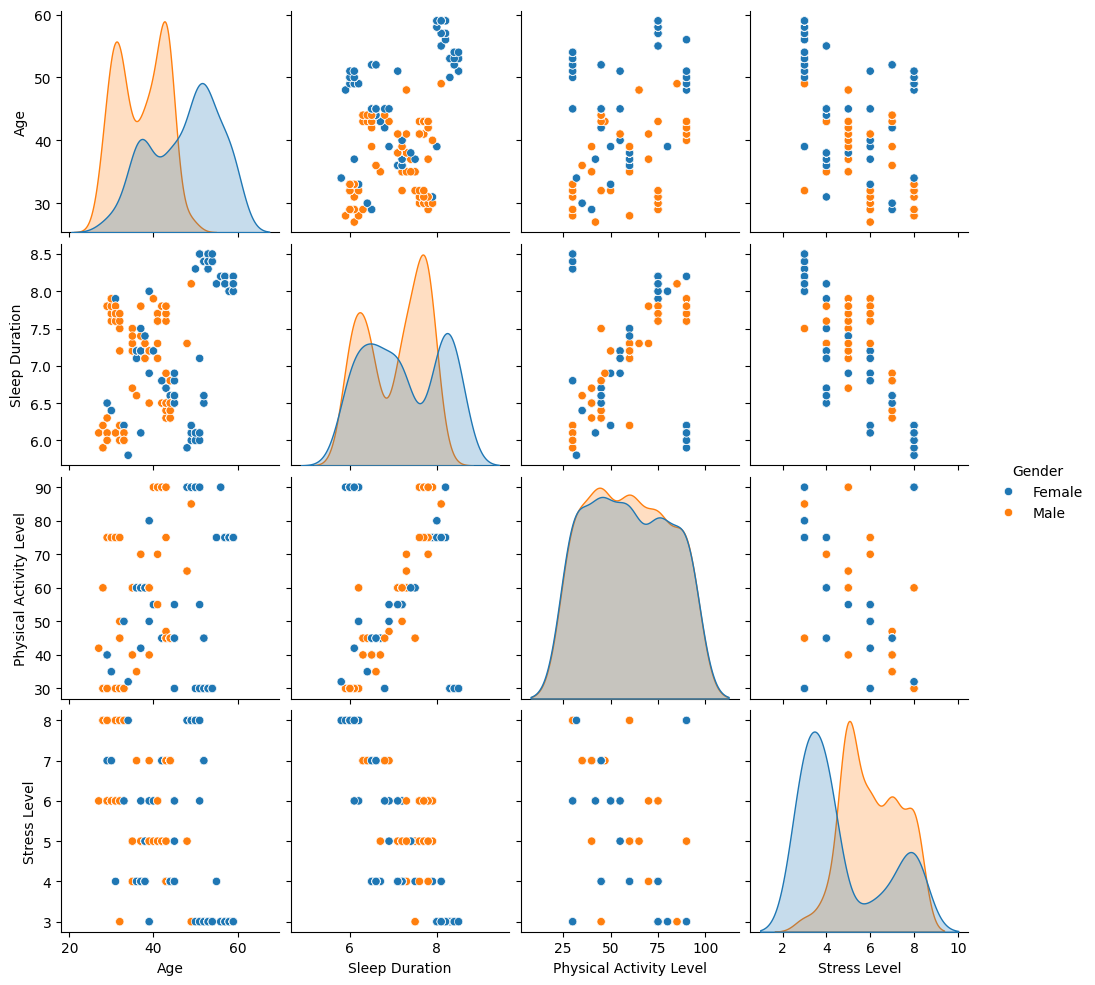

In [58]:
# Pair plot comparing multiple variables
sns.pairplot(df[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level','Gender']], hue='Gender')
plt.show()

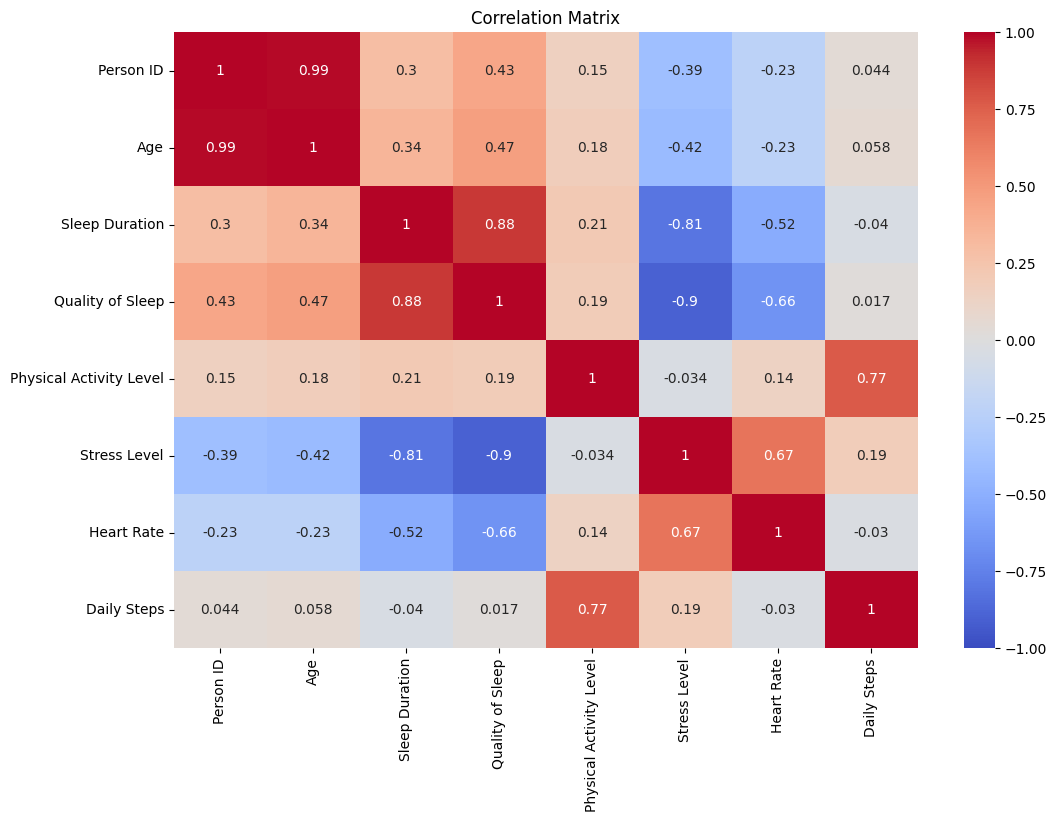

In [59]:
# Creation of Correlation chart could better show us how the variables are related and influence each other

# Encode categorical variables using one-hot encoding - Categorical and other variables to possible numeric values
df_encoded = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], drop_first=True)

numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Presenting to the chart
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Understanding from the correlation chart
- Age and Sleep Duration have a moderate positive correlation (0.34).
- Sleep Duration and Quality of Sleep have a strong positive correlation (0.88).
- Physical Activity Level and Daily Steps have a strong positive correlation (0.77).
- Stress Level and Quality of Sleep have a strong negative correlation (-0.90).
- Heart Rate and Stress Level have a moderate positive correlation (0.67).

The positive correlation have a direct effect were as the negative correlation will have a indirect effect.

In [60]:
# Hypothesis testing: Sleep Duration by Gender
# Extract sleep duration for males and females
male_sleep_duration = df[df['Gender'] == 'Male']['Sleep Duration']
female_sleep_duration = df[df['Gender'] == 'Female']['Sleep Duration']

# Perform t-test
t_stat, p_value = ttest_ind(male_sleep_duration, female_sleep_duration)
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: -2.3624469898393397, p-value: 0.01866885927060745


Based on the t-test results, there is a significant difference in sleep duration between genders. The negative t-statistic value indicates that, on average, females tend to have a longer sleep duration compared to males (Also can be seen in the above box plot). Additionally, the low p-value suggests that this difference is unlikely to be due to random chance alone, further supporting the rejection of the null hypothesis